In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy.stats import shapiro

In [3]:
df = pd.read_csv('final_dataset.csv')
df['Nyhedsbureau'].value_counts()
df

df['time_group'] = df['time_group'].replace('morning', 1)
df['time_group'] = df['time_group'].replace('day', 2)
df['time_group'] = df['time_group'].replace('evening', 3)

df

,Unnamed: 0,Category,Authors,Headline,Time,Live,All_text,time_group,LIX,first_name,Boy,Girl,Nyhedsbureau,LIX_Headline
0,0,Udland,Mathias Hobolth Østerlund,Efter to år med Taleban er kvindernes sidste f...,2023-08-15 10:38:00,0,['Efter to år ved magten har Taliban gjort det...,2,39.097430,Mathias,1,0,0,50.000000
1,1,Samfund,Signe Marie Frost,"Elever bruger to smuthuller i telefonforbud, f...",2023-08-15 10:38:00,0,['Eleverne vil altid være i stand til at finde...,2,39.229083,Signe,0,1,0,58.000000
2,2,Samfund,"Amanda Nygaard Frisk, Jessica Skovmose",Færre færgeafgange til øer presser landmænd,2023-08-15 09:56:00,0,"['På Fejø, Femø og Askø skal en ny elfærge fin...",2,38.546371,Amanda,0,1,0,56.000000
3,3,Samfund,Amalie Abildgaard,Tidligere islamist: - Man skal 100 procent tag...,2023-08-15 09:01:00,0,"['Al-Qaeda har udsendt en trussel mod Danmark,...",2,42.699095,Amalie,0,1,0,56.454545
4,4,Udland,Livecenter,Seneste nyt om krigen i Ukraine,2023-08-15 09:00:00,1,['Hvad sker der? Rusland har udført et stort l...,2,44.711451,Livecenter,0,0,1,39.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,25718,Vejr,Sebastian Pelt,Fascinerende skyer set over Sydsjælland fredag,2019-03-16 14:47:00,0,['En speciel skytype blev set fredag eftermidd...,2,39.103346,Sebastian,1,0,0,39.333333
25719,25719,Vejr,Sebastian Pelt,Det bliver ved - drivvåd lørdag forude,2019-03-16 11:24:00,0,['Det ekstremt våde martsvejr fortsætter uden ...,2,41.214597,Sebastian,1,0,0,22.666667
25720,25720,Vejr,Anders Brandt,Nyt stormlavtryk truer Danmark i weekenden,2019-03-15 21:00:00,0,['Endnu et kraftigt blæsevejr kan være på vej ...,3,48.185984,Anders,1,0,0,56.000000
25721,25721,Vejr,Anders Brandt,Danmark ramt af storm - den kraftigste i marts...,2019-03-15 16:16:00,0,['Et lille intenst lavtryk passerede fredag Da...,3,50.875861,Anders,1,0,0,29.181818


In [4]:
df.drop(['Authors', 'Time', 'Headline', 'Unnamed: 0', 'All_text', 'first_name'], axis=1, inplace=True)

dummies = pd.get_dummies(df['Category'], prefix='Category')
df = pd.concat([df, dummies], axis=1)
df.drop('Category', axis=1, inplace=True)

df['IsBoy'] = df['Boy']
df.drop(['Boy', 'Girl'], axis=1, inplace=True)

df.drop('Category_Other', axis=1, inplace=True)


"""
#Remove outliers

z_scores = np.abs(stats.zscore(df['LIX']))
# Define a threshold to identify an outlier
threshold = 3
without_outliers_zscore = df[z_scores < threshold]

# 2. Using IQR:

# Calculate Q1, Q3, and IQR
Q1 = df['LIX'].quantile(0.25)
Q3 = df['LIX'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
without_outliers_iqr = df[(df['LIX'] >= lower_bound) & (df['LIX'] <= upper_bound)]
"""


df = df.dropna()
df

,Live,time_group,LIX,Nyhedsbureau,LIX_Headline,Category_Business,Category_Krimi,Category_Politik,Category_Samfund,Category_Sport,Category_Udland,Category_Underholdning,Category_Vejr,IsBoy
0,0,2,39.097430,0,50.000000,0,0,0,0,0,1,0,0,1
1,0,2,39.229083,0,58.000000,0,0,0,1,0,0,0,0,0
2,0,2,38.546371,0,56.000000,0,0,0,1,0,0,0,0,0
3,0,2,42.699095,0,56.454545,0,0,0,1,0,0,0,0,0
4,1,2,44.711451,1,39.333333,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,0,2,39.103346,0,39.333333,0,0,0,0,0,0,0,1,1
25719,0,2,41.214597,0,22.666667,0,0,0,0,0,0,0,1,1
25720,0,3,48.185984,0,56.000000,0,0,0,0,0,0,0,1,1
25721,0,3,50.875861,0,29.181818,0,0,0,0,0,0,0,1,1


In [5]:
df_vif = add_constant(df)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

print(vif_data)

corr_matrix = df.corr()
corr_matrix

                  Variable        VIF
0                    const  97.445245
1                     Live   1.004928
2               time_group   1.040519
3                      LIX   1.367353
4             Nyhedsbureau   1.853120
5             LIX_Headline   1.116204
6        Category_Business   1.638367
7           Category_Krimi   2.111560
8         Category_Politik   2.807949
9         Category_Samfund   5.282313
10          Category_Sport   5.252019
11         Category_Udland   5.137784
12  Category_Underholdning   1.195278
13           Category_Vejr   5.213197
14                   IsBoy   2.168935


,Live,time_group,LIX,Nyhedsbureau,LIX_Headline,Category_Business,Category_Krimi,Category_Politik,Category_Samfund,Category_Sport,Category_Udland,Category_Underholdning,Category_Vejr,IsBoy
Live,1.000000,-0.048721,0.010471,-0.015635,0.022718,-0.006326,0.001439,0.000087,0.013697,-0.016367,0.018597,-0.003381,-0.016078,-0.014706
time_group,-0.048721,1.000000,-0.009222,-0.142656,0.025230,0.005286,-0.007333,0.021690,0.003893,0.077592,-0.078264,0.048060,-0.016643,0.087553
LIX,0.010471,-0.009222,1.000000,0.166125,0.281150,0.054258,0.005288,0.083864,0.040552,-0.321410,0.351723,-0.019761,-0.175796,-0.228125
Nyhedsbureau,-0.015635,-0.142656,0.166125,1.000000,0.094181,0.022880,0.147201,-0.015245,-0.021547,0.039391,0.203523,-0.050853,-0.276509,-0.621564
LIX_Headline,0.022718,0.025230,0.281150,0.094181,1.000000,0.014171,0.001820,0.057554,0.059701,-0.043693,0.123019,-0.030100,-0.195778,-0.126863
Category_Business,-0.006326,0.005286,0.054258,0.022880,0.014171,1.000000,-0.035351,-0.047506,-0.087000,-0.079564,-0.082060,-0.014189,-0.078448,-0.034916
Category_Krimi,0.001439,-0.007333,0.005288,0.147201,0.001820,-0.035351,1.000000,-0.063254,-0.115840,-0.105940,-0.109262,-0.018892,-0.104453,-0.151239
Category_Politik,0.000087,0.021690,0.083864,-0.015245,0.057554,-0.047506,-0.063254,1.000000,-0.155668,-0.142364,-0.146829,-0.025387,-0.140366,-0.170007
Category_Samfund,0.013697,0.003893,0.040552,-0.021547,0.059701,-0.087000,-0.115840,-0.155668,1.000000,-0.260718,-0.268894,-0.046493,-0.257059,-0.149739
Category_Sport,-0.016367,0.077592,-0.321410,0.039391,-0.043693,-0.079564,-0.105940,-0.142364,-0.260718,1.000000,-0.245913,-0.042520,-0.235090,0.167714


In [10]:
X = df.drop('LIX', axis=1)
y = df['LIX']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

feature_names = X_train.columns.tolist()

## Elastic Net

In [7]:
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

y_pred_EN = elastic_net.predict(X_test)
mse_EN = mean_squared_error(y_test, y_pred_EN)
r2_EN = r2_score(y_test, y_pred_EN)

print(mse_EN)
print(r2_EN)

32.85835573047472
0.11730521775183922


In [16]:
# Required imports
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define hyperparameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# Initialize model and GridSearchCV
elastic_net = ElasticNet()

grid_search = GridSearchCV(estimator=elastic_net, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Extract best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)

# If l1_ratio is 1, it's LASSO
if best_params['l1_ratio'] == 1:
    print("The best model is effectively LASSO.")

# Show coefficients and intercept of the best model
#print("Coefficients:", best_model.coef_)
#print("Intercept:", best_model.intercept_)

print('\n')
# Display feature names alongside coefficients
for feature, coef in zip(feature_names, best_model.coef_):
    print(f"{feature}: {coef}")
print('\n')

# Predict using the best model
y_pred_EN = best_model.predict(X_test)

# Calculate MSE and R^2
mse_EN = mean_squared_error(y_test, y_pred_EN)
r2_EN = r2_score(y_test, y_pred_EN)

print(f"Mean Squared Error (MSE): {mse_EN}")
print(f"R^2 Score: {r2_EN}")


Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best hyperparameters: {'alpha': 0.001, 'l1_ratio': 1}
The best model is effectively LASSO.


Live: 0.0
time_group: 0.30812896283903635
Nyhedsbureau: 1.0392596333358006
LIX_Headline: 0.07373632397247265
Category_Business: 0.908322015957818
Category_Krimi: -1.1974116461456585
Category_Politik: 0.5940925323758227
Category_Samfund: -0.5465824728353977
Category_Sport: -4.879703492171302
Category_Udland: 2.769806169217335
Category_Underholdning: -1.4950018068641018
Category_Vejr: -2.1560903056658836
IsBoy: -0.3030511097507256


Mean Squared Error (MSE): 27.425479106386273
R^2 Score: 0.26325201703836554


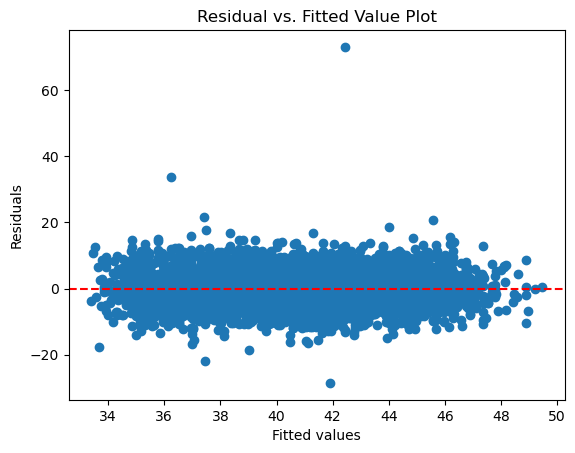

Durbin-Watson: 2.0423202837406143
Breusch-Pagan test: LM Statistic = 35.012780553114546, LM-Test p-value = 0.0008428579338876325


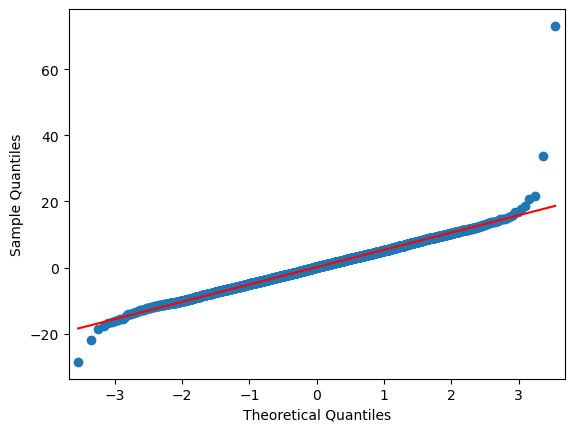

Anderson-Darling Test: Statistic = 1.2770520009080428
At significance level 15.0, data does not look normal (Reject H0)
At significance level 10.0, data does not look normal (Reject H0)
At significance level 5.0, data does not look normal (Reject H0)
At significance level 2.5, data does not look normal (Reject H0)
At significance level 1.0, data does not look normal (Reject H0)


C:\Users\Mathias\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [64]:
residuals = y_test - y_pred_EN

# Linearity - Residual Plot
plt.scatter(y_pred_EN, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual vs. Fitted Value Plot")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# Independence - Durbin-Watson
dw = sm.stats.durbin_watson(residuals)
print("Durbin-Watson:", dw)

# Homoscedasticity - Breusch-Pagan
bp_test = sms.het_breuschpagan(residuals, sm.add_constant(X_test))
print(f"Breusch-Pagan test: LM Statistic = {bp_test[0]}, LM-Test p-value = {bp_test[1]}")

# Normality - QQ-Plot and Shapiro-Wilk
sm.qqplot(residuals, line='s')
plt.show()

shapiro_test = shapiro(residuals)
#print(f"Shapiro-Wilk Test: W = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

from scipy.stats import kstest, anderson

# For the Kolmogorov-Smirnov test
ks_statistic, ks_p_value = kstest(residuals, 'norm')
#print(f"K-S Test: Statistic = {ks_statistic}, p-value = {ks_p_value}")
result = anderson(residuals, dist='norm')
print(f"Anderson-Darling Test: Statistic = {result.statistic}")
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At significance level {sl}, data looks normal (Fail to reject H0)")
    else:
        print(f"At significance level {sl}, data does not look normal (Reject H0)")

## Random Forrest

In [65]:
rf = RandomForestRegressor(n_estimators=100, random_state=123, oob_score=True)
rf.fit(X_train, y_train)

y_pred_RF = rf.predict(X_test)
mse_RF = mean_squared_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)

print(mse_RF)
print(r2_RF)

29.061426147969456
0.21930453745403256


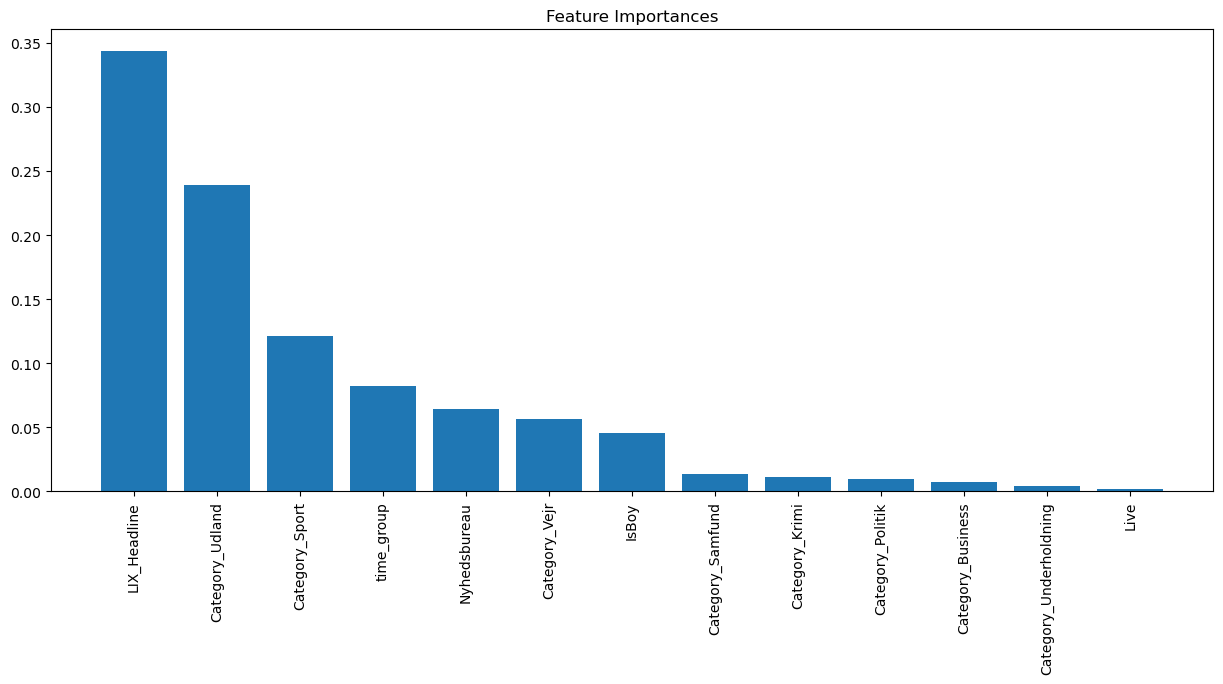

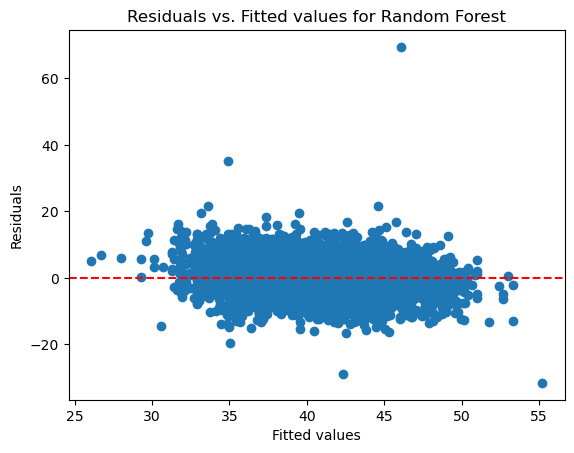

OOB Score: 0.22349277619435237


In [66]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Residuals plot
residuals_RF = y_test - y_pred_RF
plt.scatter(y_pred_RF, residuals_RF)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted values for Random Forest")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# OOB Score (Only if you set oob_score=True in the Random Forest Regressor)
if hasattr(rf, "oob_score_"):
    print("OOB Score:", rf.oob_score_)

## OLS

In [67]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

#model = sm.OLS(y_train, X_train_const).fit()
model = sm.RLM(y_train, X_train_const, M=sm.robust.norms.HuberT()).fit() #Robust

# Print out the statistics
print(model.summary())

y_pred_OLS = model.predict(X_test_const)

mae = mean_absolute_error(y_test, y_pred_OLS)
mse = mean_squared_error(y_test, y_pred_OLS)
r2 = r2_score(y_test, y_pred_OLS)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

                    Robust linear Model Regression Results                    
Dep. Variable:                    LIX   No. Observations:                20198
Model:                            RLM   Df Residuals:                    20184
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 20 Aug 2023                                         
Time:                        16:24:08                                         
No. Iterations:                    14                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     38

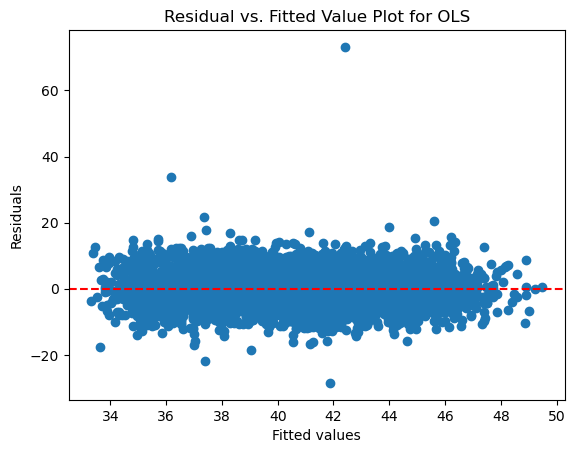

Durbin-Watson: 2.0422141439357158
Breusch-Pagan test: LM Statistic = 35.4638048160685, LM-Test p-value = 0.0007182951925327962
White's test: LM Statistic = 80.71500070000458, LM-Test p-value = 0.01696761792975146
Goldfeld-Quandt test: F Statistic = 0.9504922623945342, p-value = 0.8983091865621818
                              VIF
const                   44.500994
Live                     1.004813
time_group               1.041455
Nyhedsbureau             1.846368
LIX_Headline             1.058254
Category_Business        1.646125
Category_Krimi           2.138016
Category_Politik         2.906937
Category_Samfund         5.434307
Category_Sport           5.245184
Category_Udland          5.275194
Category_Underholdning   1.209429
Category_Vejr            5.323237
IsBoy                    2.170188


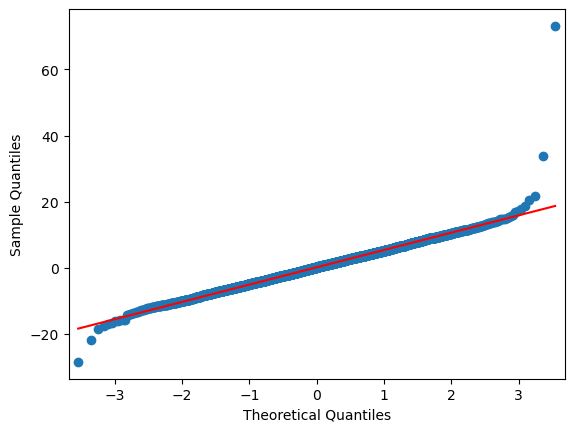

Shapiro-Wilk Test: W = 0.9764899015426636, p-value = 4.295921556051837e-28


C:\Users\Mathias\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [68]:
residuals_OLS = y_test - y_pred_OLS

# 1. Linearity - Residual Plot
plt.scatter(y_pred_OLS, residuals_OLS)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual vs. Fitted Value Plot for OLS")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# 2. Independence - Durbin-Watson
dw = sm.stats.durbin_watson(residuals_OLS)
print("Durbin-Watson:", dw)

# 3. Homoscedasticity
# Breusch-Pagan
bp_test = sms.het_breuschpagan(residuals_OLS, X_test_const)
print(f"Breusch-Pagan test: LM Statistic = {bp_test[0]}, LM-Test p-value = {bp_test[1]}")

# White's test
white_test = sms.diagnostic.het_white(residuals_OLS, X_test_const)
print(f"White's test: LM Statistic = {white_test[0]}, LM-Test p-value = {white_test[1]}")

# Goldfeld-Quandt
gq_test = sms.diagnostic.het_goldfeldquandt(y_test, X_test_const)
print(f"Goldfeld-Quandt test: F Statistic = {gq_test[0]}, p-value = {gq_test[1]}")

# 4. Multicollinearity - VIF
vif_data = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
vif = pd.DataFrame({'VIF': vif_data}, index=X_train_const.columns)
print(vif)

# 5. Normality - QQ-Plot and Shapiro-Wilk
sm.qqplot(residuals_OLS, line='s')
plt.show()

shapiro_test = shapiro(residuals_OLS)
print(f"Shapiro-Wilk Test: W = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

In [31]:
df_sort = df.sort_values('LIX', ascending=False)
df_sort.head(20)

,Live,time_group,LIX,Nyhedsbureau,LIX_Headline,Category_Business,Category_Krimi,Category_Politik,Category_Samfund,Category_Sport,Category_Udland,Category_Underholdning,Category_Vejr,IsBoy
9510,0,1,115.588235,0,65.000000,0,0,0,1,0,0,0,0,0
3904,0,3,100.387415,0,51.461538,0,0,1,0,0,0,0,0,0
17367,0,1,88.642327,0,29.000000,0,0,0,0,1,0,0,0,1
17792,0,2,87.660604,0,33.000000,0,0,0,0,1,0,0,0,1
17815,0,2,70.103614,0,39.333333,0,0,0,0,1,0,0,0,1
16736,0,1,68.333333,0,64.142857,0,0,0,0,1,0,0,0,1
17341,0,1,67.437838,0,45.000000,0,0,0,0,1,0,0,0,1
1123,0,3,66.238095,1,40.000000,0,0,0,0,0,1,0,0,0
7125,0,1,64.807018,0,79.000000,0,0,0,1,0,0,0,0,0
17809,0,2,64.770011,0,45.000000,0,0,0,0,1,0,0,0,1


In [15]:
df.iloc[3904]

Live                       0.000000
time_group                 2.000000
LIX                       36.457014
Nyhedsbureau               1.000000
LIX_Headline              29.181818
Category_Business          0.000000
Category_Krimi             1.000000
Category_Politik           0.000000
Category_Samfund           0.000000
Category_Sport             0.000000
Category_Udland            0.000000
Category_Underholdning     0.000000
Category_Vejr              0.000000
IsBoy                      0.000000
Name: 4047, dtype: float64